*This post borrows notation and structure from pages 18-57 of Anil Ananthaswamy's fantastic book: "Why Machines Learn". Readers are expected to have some familiarity with concepts from Linear Algebra, including **vectors**, **dot products**, and related **operations** on vectors/matrices.*

### The Perceptron

The perceptron is a simple, ubiquitous, and conceptually important machine learning model and associated optimization algorithm. Essentially, it is binary classifier that assigns points $\mathbf{x} \in \mathbb{R}^{1 \times d}$ to one of two categories–and that is parameterized by a weight vector $ \mathbf{w} \in \mathbb{R}^{1 \times d} $ and a bias term $ b \in \mathbb{R}$ . Here, $\mathbf{x} = [x_1, \dots, x_n]$ and $\mathbf{w} = [w_1, \dots, w_n]$. We can write this model out as a simple piecewise function:

$$
  y = 
  \begin{cases} 
    +1 & \sum_{i=1}^{n} w_i x_i + b \geq 0 \\ 
    -1 & \text{otherwise}
  \end{cases} \text{.}
$$

Or, written using the notation of matrix multiplication the perctron looks like this:

$$
  y = 
  \begin{cases} 
    +1 & \mathbf{w}^{\top} \mathbf{x} + b \geq 0 \\ 
    -1 & \text{otherwise}
  \end{cases} \text{.}           
$$

We can think of the equation above as characterizing a hyperplane with dimensionality $\mathbb{R}^{d - 1}$, capable of spliting any space in two. Points $\mathbf{x}$ that lie in $\mathbb{R}^{d}$ are classified as either $-1$ or $+1$ by our perceptron model. To make things more concrete, we'll start off by showing the reader an example in $\mathbb{R}^{2}$ for a weight vector $\mathbf{w} = [1, 1]$ and bias term $b=0$.

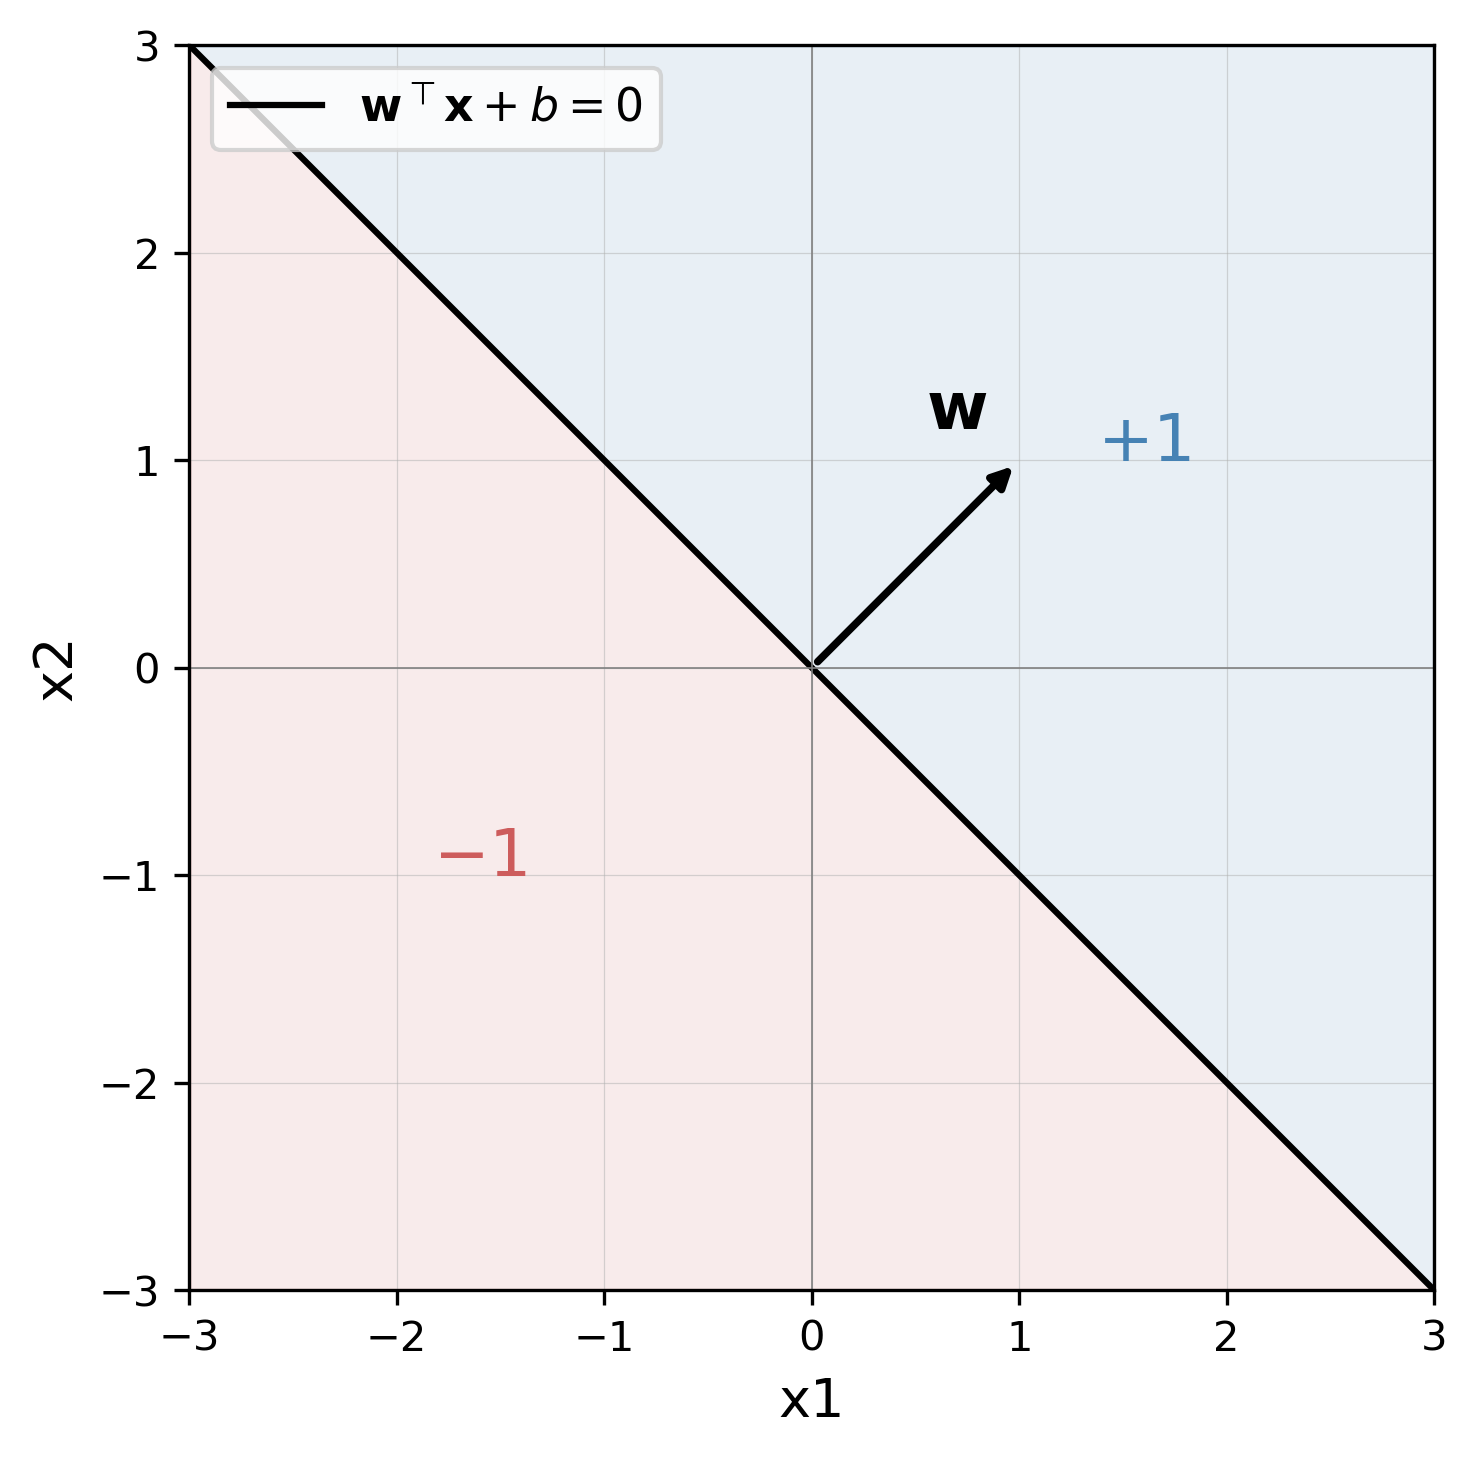

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

w = np.array([1, 1])
b = 0

fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

# Decision boundary: w^T x + b = 0 => x2 = -x1
boundary_x = np.array([-3, 3])
boundary_y = -boundary_x
ax.plot(boundary_x, boundary_y, "k-", linewidth=1.5, label=r"$\mathbf{w}^\top \mathbf{x} + b = 0$")

# Shade the +1 and -1 regions
ax.fill_between(boundary_x, boundary_y, 3, color="steelblue", alpha=0.12)
ax.fill_between(boundary_x, boundary_y, -3, color="indianred", alpha=0.12)

# Region labels
ax.text(1.6, 1.0, r"$+1$", fontsize=16, color="steelblue", fontweight="bold", ha="center")
ax.text(-1.6, -1.0, r"$-1$", fontsize=16, color="indianred", fontweight="bold", ha="center")

# Weight vector w as an arrow from origin
ax.annotate(
    "", xy=(1, 1), xytext=(0, 0),
    arrowprops=dict(arrowstyle="-|>", color="black", lw=1.8),
)
ax.text(0.7, 1.15, r"$\mathbf{w}$", fontsize=16, ha="center")

# Axes
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel(r"x1", fontsize=13)
ax.set_ylabel(r"x2", fontsize=13)
ax.set_aspect("equal")
ax.axhline(0, color="gray", linewidth=0.4)
ax.axvline(0, color="gray", linewidth=0.4)
ax.legend(fontsize=11, loc="upper left")
ax.grid(True, linewidth=0.3, alpha=0.5)

plt.tight_layout()
plt.show()

The weight vector $\mathbf{w}$, starting at the origin and extending toward [1,1], is orthogonal to a plane of separation that passes through the origin when $b=0$. In this example, points that fall to the right of the black line are classified as $+1$, and points to left as $-1$. It may seem straightforward, but what happens visualy when we set the bias term to a non-zero value, say $b=-4$?

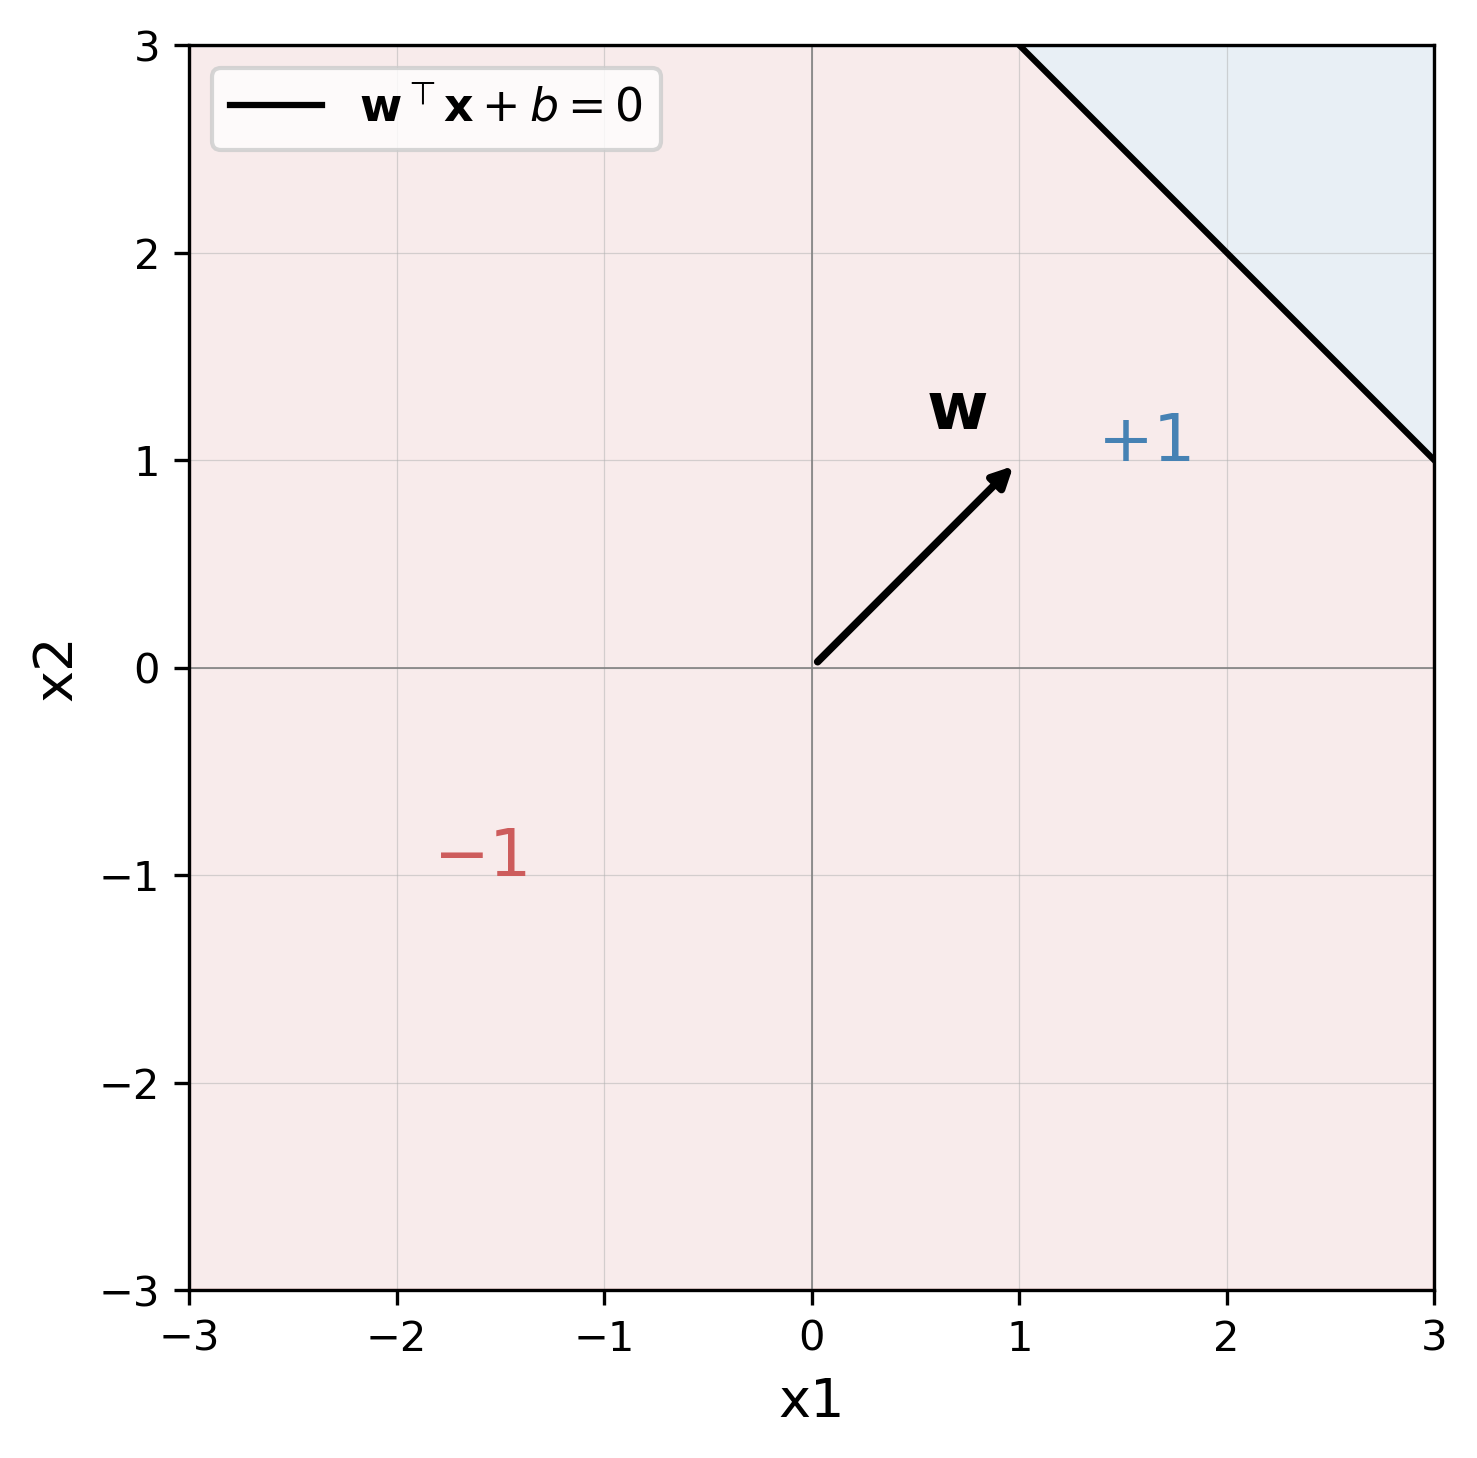

In [8]:
w = np.array([1, 1])
b = -4

fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

# Decision boundary: w^T x + b = 0 => x2 = -x1 - 1
boundary_x = np.array([-3, 3])
boundary_y = -boundary_x - b
ax.plot(boundary_x, boundary_y, "k-", linewidth=1.5, label=r"$\mathbf{w}^\top \mathbf{x} + b = 0$")

# Shade the +1 and -1 regions
ax.fill_between(boundary_x, boundary_y, 3, color="steelblue", alpha=0.12)
ax.fill_between(boundary_x, boundary_y, -3, color="indianred", alpha=0.12)

# Region labels
ax.text(1.6, 1.0, r"$+1$", fontsize=16, color="steelblue", fontweight="bold", ha="center")
ax.text(-1.6, -1.0, r"$-1$", fontsize=16, color="indianred", fontweight="bold", ha="center")

# Weight vector w as an arrow from origin
ax.annotate(
    "", xy=(1, 1), xytext=(0, 0),
    arrowprops=dict(arrowstyle="-|>", color="black", lw=1.8),
)
ax.text(0.7, 1.15, r"$\mathbf{w}$", fontsize=16, ha="center")

# Axes
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel(r"x1", fontsize=13)
ax.set_ylabel(r"x2", fontsize=13)
ax.set_aspect("equal")
ax.axhline(0, color="gray", linewidth=0.4)
ax.axvline(0, color="gray", linewidth=0.4)
ax.legend(fontsize=11, loc="upper left")
ax.grid(True, linewidth=0.3, alpha=0.5)

plt.tight_layout()
plt.show()

Our seperating plane shifts toward the left, away from the orgin. You can imagine that our weight vector $\mathbf{w}$ has been "translated" such that it's magnitude remains that same, and it's point of origin is $[-b, -b]$. This is just an intuition of course, and all vectors live at the origin. Now we can begin to turn our attention toward what the perceptron is actually good for: binary classification. Specifically, a perceptron can achieve perfect accuarcy and generalization for any dataset whose points are linearly seperable–that is, points belonging to different classes can be seperated by a plane. 

Consider a dataset of basektball players $\mathcal{D} = \{ (\mathbf{x}_i, y_i) \}_{i=1 \dots n}$, still in $\mathbb{R}^2$, where $\mathbf{x}_i = [\text{in. above avg. height}, \text{in. above avg. vertical leap}]$, and $y_i = +1$ and $y_i = -1$ indicate that player **can** or can **not** dunk, respectively. Reusing our perceptron model from earlier, our dataset might look like so:

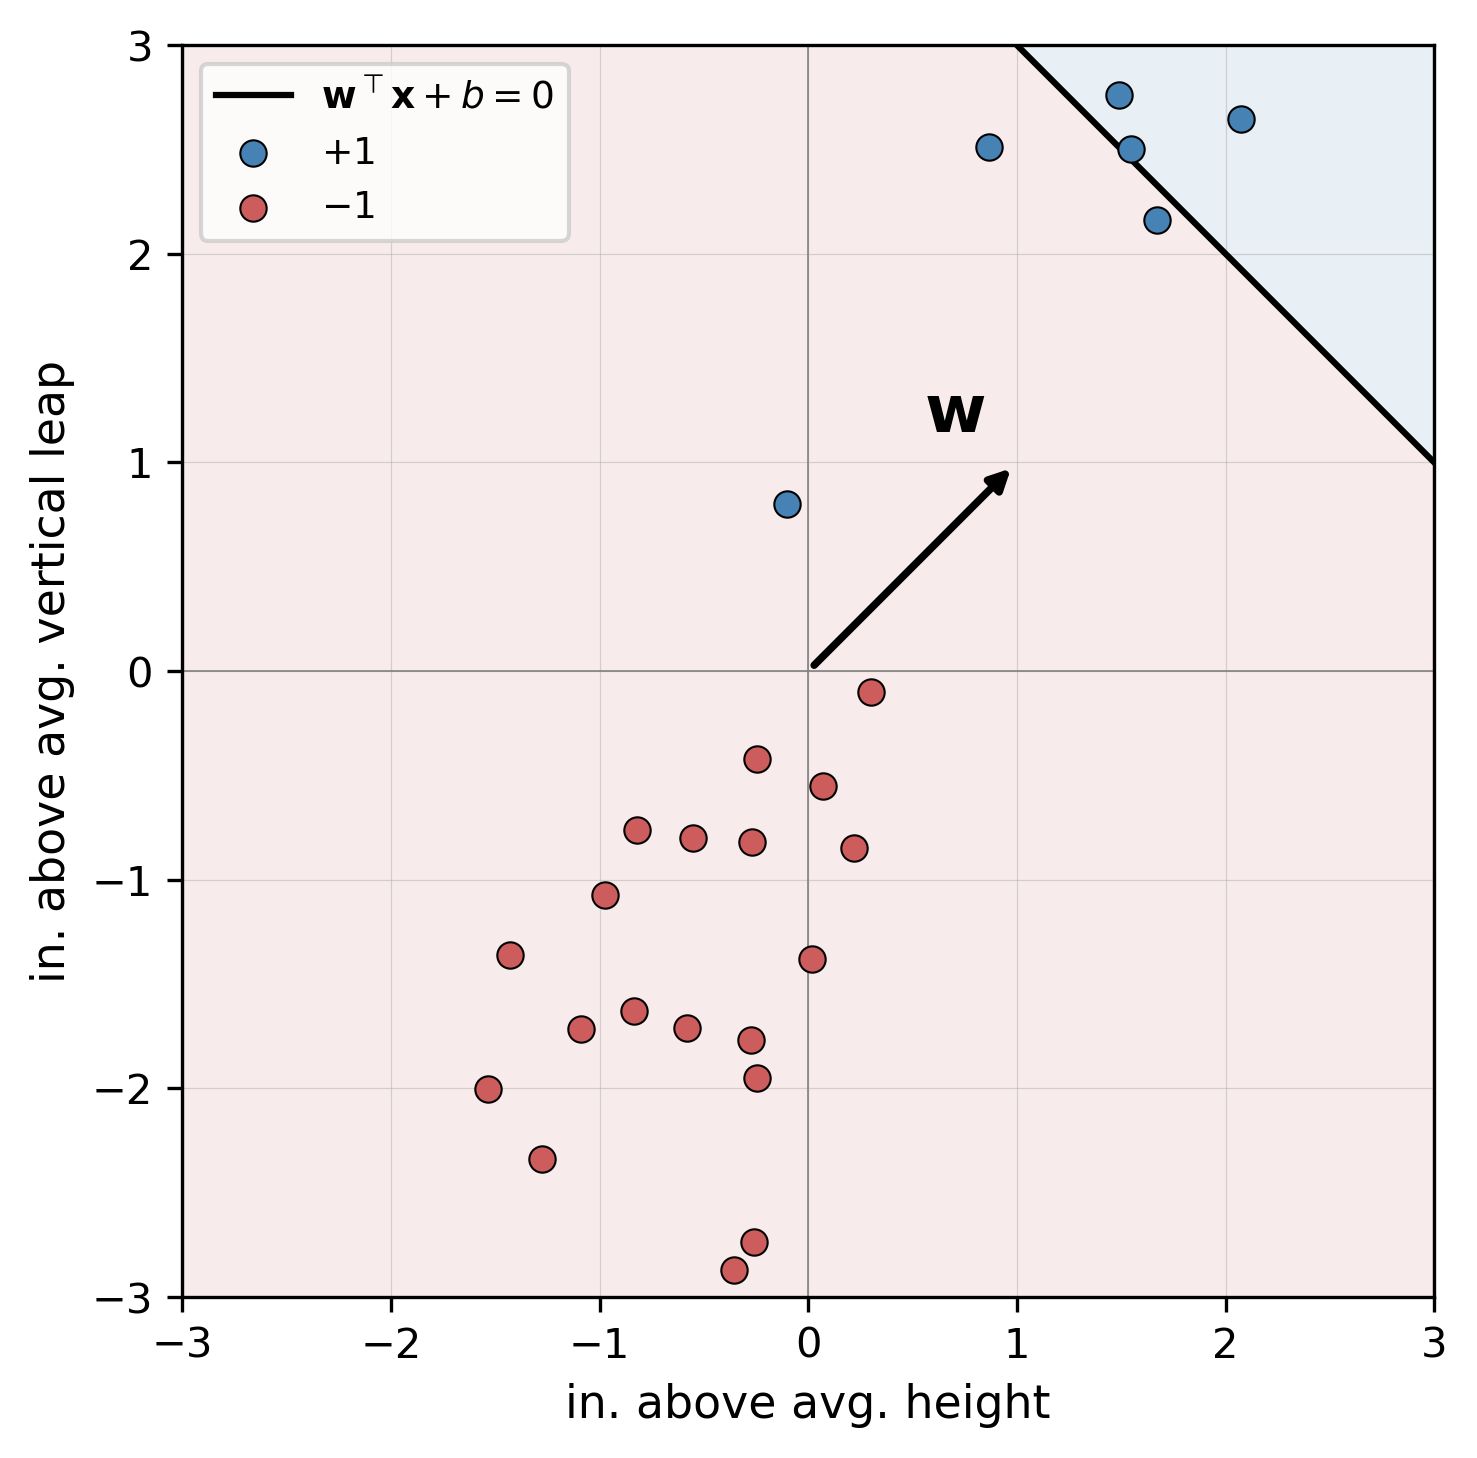

In [9]:
np.random.seed(42)

# Synthetic dataset: can dunk (+1) vs can't dunk (-1)
n = 18
can_dunk = np.random.randn(n, 2) * 0.7 + np.array([1.5, 3.5])
cant_dunk = np.random.randn(n, 2) * 0.7 + np.array([-0.5, -1.5])
# Add a couple points near the boundary that will be misclassified
can_dunk = np.vstack([can_dunk, [[-0.1, 0.8]]])
cant_dunk = np.vstack([cant_dunk, [[0.3, -0.1]]])

w = np.array([1, 1])
b = -4

fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

# Decision boundary
boundary_x = np.array([-3, 3])
boundary_y = -boundary_x - b
ax.plot(boundary_x, boundary_y, "k-", linewidth=1.5, label=r"$\mathbf{w}^\top \mathbf{x} + b = 0$")

# Shade the +1 and -1 regions
ax.fill_between(boundary_x, boundary_y, 4, color="steelblue", alpha=0.12)
ax.fill_between(boundary_x, boundary_y, -4, color="indianred", alpha=0.12)

# Data points
ax.scatter(can_dunk[:, 0], can_dunk[:, 1], c="steelblue", edgecolors="k",
           linewidths=0.5, s=40, zorder=5, label="$+1$")
ax.scatter(cant_dunk[:, 0], cant_dunk[:, 1], c="indianred", edgecolors="k",
           linewidths=0.5, s=40, zorder=5, label="$-1$")

# Weight vector w as an arrow from origin
ax.annotate(
    "", xy=(1, 1), xytext=(0, 0),
    arrowprops=dict(arrowstyle="-|>", color="black", lw=1.8),
)
ax.text(0.7, 1.15, r"$\mathbf{w}$", fontsize=16, ha="center")

# Axes
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel("in. above avg. height", fontsize=11)
ax.set_ylabel("in. above avg. vertical leap", fontsize=11)
ax.set_aspect("equal")
ax.axhline(0, color="gray", linewidth=0.4)
ax.axvline(0, color="gray", linewidth=0.4)
ax.legend(fontsize=9, loc="upper left")
ax.grid(True, linewidth=0.3, alpha=0.5)

plt.tight_layout()
plt.show()

Yikes, it looks like our model has misclasified some non-dunkers as dunkers! Now we have a dilemma: we know that our dataset is linearly seperable, but we don't know how to set the values of $\mathbf{w}$ such that each feature is assigned to the correct class. This leads us to the **Perceptron learning algorithm**–a recursive procedure responsible for updating $\mathbf{w}$ and $b$ and which is gaurnteed to succeed for any linearly separably dataset$^*$. We'll start off by grouping the bias term $b$ into the weight matrix $\mathbf{w}$ for notational convience. We can rewrite $\mathbf{x} = [x_0, x_1, \dots, x_n]$ and $\mathbf{w} = [w_0, w_1, \dots, w_n]$, where $x_0 = 1$ and $w_0 = b$. Note that while, in the example above, $\mathbf{x}$ and $\mathbf{w}$ now techically exist in $\mathbb{R}^3$, we can still visual our perceptron in two-dimensions as before. Bias terms subsumed, our compacted model can written as:

$$
  y = 
  \begin{cases} 
    +1 & \mathbf{w}^{\top} \mathbf{x} \geq 0 \\ 
    -1 & \text{otherwise}
  \end{cases} \text{.}           
$$ .

Now we're ready to define our optimization algorithm.

$$                                                                                                                                                                                                     
  \begin{aligned}                                                                                                                                                                                           
  &\textbf{Step 1: } \mathbf{w} \leftarrow \mathbf{0} \\                                                                                                                                                    
  &\textbf{Step 2: } \text{for } \mathbf{x}_i \in \mathcal{D}\text{:} \\                                                                                                                                    
  &\quad \text{if } y_i \, \mathbf{w}^\top \mathbf{x}_i \leq 0\text{:} \\
  &\quad\quad \mathbf{w} \leftarrow \mathbf{w} + y_i \, \mathbf{x}_i \\
  &\textbf{Step 3: } \text{if no updates to } \mathbf{w} \text{ in Step 2: end} \\
  &\quad \text{else: go to Step 2}
  \end{aligned}
$$

At a high level, this proceedure iterates through each point in our dataset. When we encounter a point that is misclassified, the algorithm updates the $\mathbf{w}$ such the plane of seperation is "nudged" in the direction of the misclasified point. We repeat this process until every point is assigned to correct label.

$^*$ A formal proof of this property is not included in this post; the reader is highly encouraged to view Prof. Kilian Weinberger's lecture referenced below for a thorogh treatment of this topic [1].

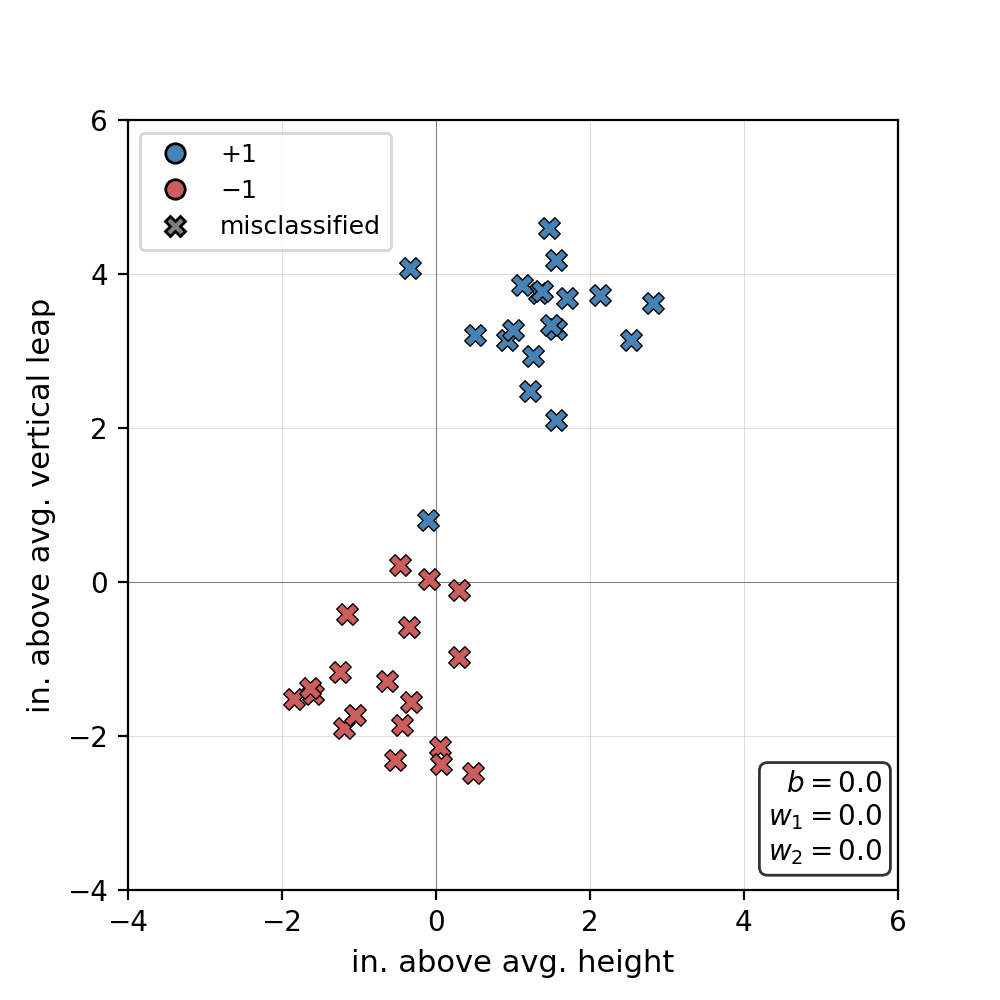

In [10]:
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.lines import Line2D
from IPython.display import Image, display


# Recreate the dataset (same seed and parameters as the figure above)
n = 18
can_dunk = np.random.randn(n, 2) * 0.7 + np.array([1.5, 3.5])
cant_dunk = np.random.randn(n, 2) * 0.7 + np.array([-0.5, -1.5])
# Add a couple points near the boundary that will be misclassified"
can_dunk = np.vstack([can_dunk, [[-0.1, 0.8]]])
cant_dunk = np.vstack([cant_dunk, [[0.3, -0.1]]])

# Augmented dataset: x = [1, x1, x2] so that w = [bias, w1, w2]
X_pos = np.hstack([np.ones((len(can_dunk), 1)), can_dunk])
X_neg = np.hstack([np.ones((len(cant_dunk), 1)), cant_dunk])
X = np.vstack([X_pos, X_neg])
y = np.array([1] * len(X_pos) + [-1] * len(X_neg))

# --- Perceptron learning algorithm (snapshot every point visit) ---
w = np.zeros(3)
snapshots = [(w.copy(), None)]  # (w_vector, current_point_index or None)

converged = False
while not converged:
    converged = True
    for i in range(len(X)):
        snapshots.append((w.copy(), i))            # examining point i
        if y[i] * (w @ X[i]) <= 0:                 # misclassified → update
            w = w + y[i] * X[i]
            snapshots.append((w.copy(), None))      # show updated boundary
            converged = False

for _ in range(18):  # hold final frame
    snapshots.append((w.copy(), None))

# --- Animation ---
fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
pts = X[:, 1:]  # (x1, x2) coordinates for plotting

def draw(k):
    ax.clear()
    w_cur, current_idx = snapshots[k]
    bias, w1, w2 = w_cur

    # Decision boundary: bias + w1*x1 + w2*x2 = 0
    bx = np.array([-4, 6])
    if abs(w1) > 1e-8 or abs(w2) > 1e-8:
        if abs(w2) > 1e-8:
            by = -(bias + w1 * bx) / w2
            ax.plot(bx, by, "k-", linewidth=1.5)
            ax.fill_between(bx, by, 6, color="steelblue", alpha=0.12)
            ax.fill_between(bx, by, -4, color="indianred", alpha=0.12)
        else:
            ax.axvline(-bias / w1, color="k", linewidth=1.5)

    # Classify every point under current w
    correct_mask = (y * (X @ w_cur)) > 0

    # Correctly classified → filled circles; misclassified → X markers
    for mask, marker, sz in [(correct_mask, "o", 40), (~correct_mask, "X", 60)]:
        pos = mask & (y == 1)
        neg = mask & (y == -1)
        if pos.any():
            ax.scatter(pts[pos, 0], pts[pos, 1], c="steelblue", edgecolors="k",
                       linewidths=0.5, s=sz, zorder=5, marker=marker)
        if neg.any():
            ax.scatter(pts[neg, 0], pts[neg, 1], c="indianred", edgecolors="k",
                       linewidths=0.5, s=sz, zorder=5, marker=marker)

    # Ring around the point currently being examined
    if current_idx is not None:
        pt = pts[current_idx]
        ring_color = "limegreen" if correct_mask[current_idx] else "orange"
        ax.scatter(pt[0], pt[1], s=180, facecolors="none",
                   edgecolors=ring_color, linewidths=2.5, zorder=6)

    # w direction arrow (fixed display length)
    wv = np.array([w1, w2])
    if np.linalg.norm(wv) > 1e-8:
        wv_disp = wv / np.linalg.norm(wv) * 1.3
        ax.annotate("", xy=wv_disp, xytext=(0, 0),
                    arrowprops=dict(arrowstyle="-|>", color="black", lw=1.8))
        ax.text(wv_disp[0] - 0.3, wv_disp[1] + 0.2,
                r"$\mathbf{w}$", fontsize=16, ha="center")

    # Display current parameter values
    ax.text(0.98, 0.03,
            f"$b = {bias:.1f}$\n$w_1 = {w1:.1f}$\n$w_2 = {w2:.1f}$",
            transform=ax.transAxes, fontsize=10, ha="right", va="bottom",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    # Styling (matching existing figures)
    ax.set_xlim(-4, 6)
    ax.set_ylim(-4, 6)
    ax.set_xlabel("in. above avg. height", fontsize=11)
    ax.set_ylabel("in. above avg. vertical leap", fontsize=11)
    ax.set_aspect("equal")
    ax.axhline(0, color="gray", linewidth=0.4)
    ax.axvline(0, color="gray", linewidth=0.4)
    legend_elements = [
        Line2D([0], [0], marker="o", color="w", markerfacecolor="steelblue",
               markeredgecolor="k", markersize=7, label="$+1$"),
        Line2D([0], [0], marker="o", color="w", markerfacecolor="indianred",
               markeredgecolor="k", markersize=7, label="$-1$"),
        Line2D([0], [0], marker="X", color="w", markerfacecolor="gray",
               markeredgecolor="k", markersize=7, label="misclassified"),
    ]
    ax.legend(handles=legend_elements, fontsize=9, loc="upper left")
    ax.grid(True, linewidth=0.3, alpha=0.5)

anim = FuncAnimation(fig, draw, frames=len(snapshots), interval=600)
anim.save("assets/img/ml-concepts/perceptron_learning.gif", writer=PillowWriter(fps=2), dpi=200)
plt.close()
display(Image(filename="assets/img/ml-concepts/perceptron_learning.gif"))

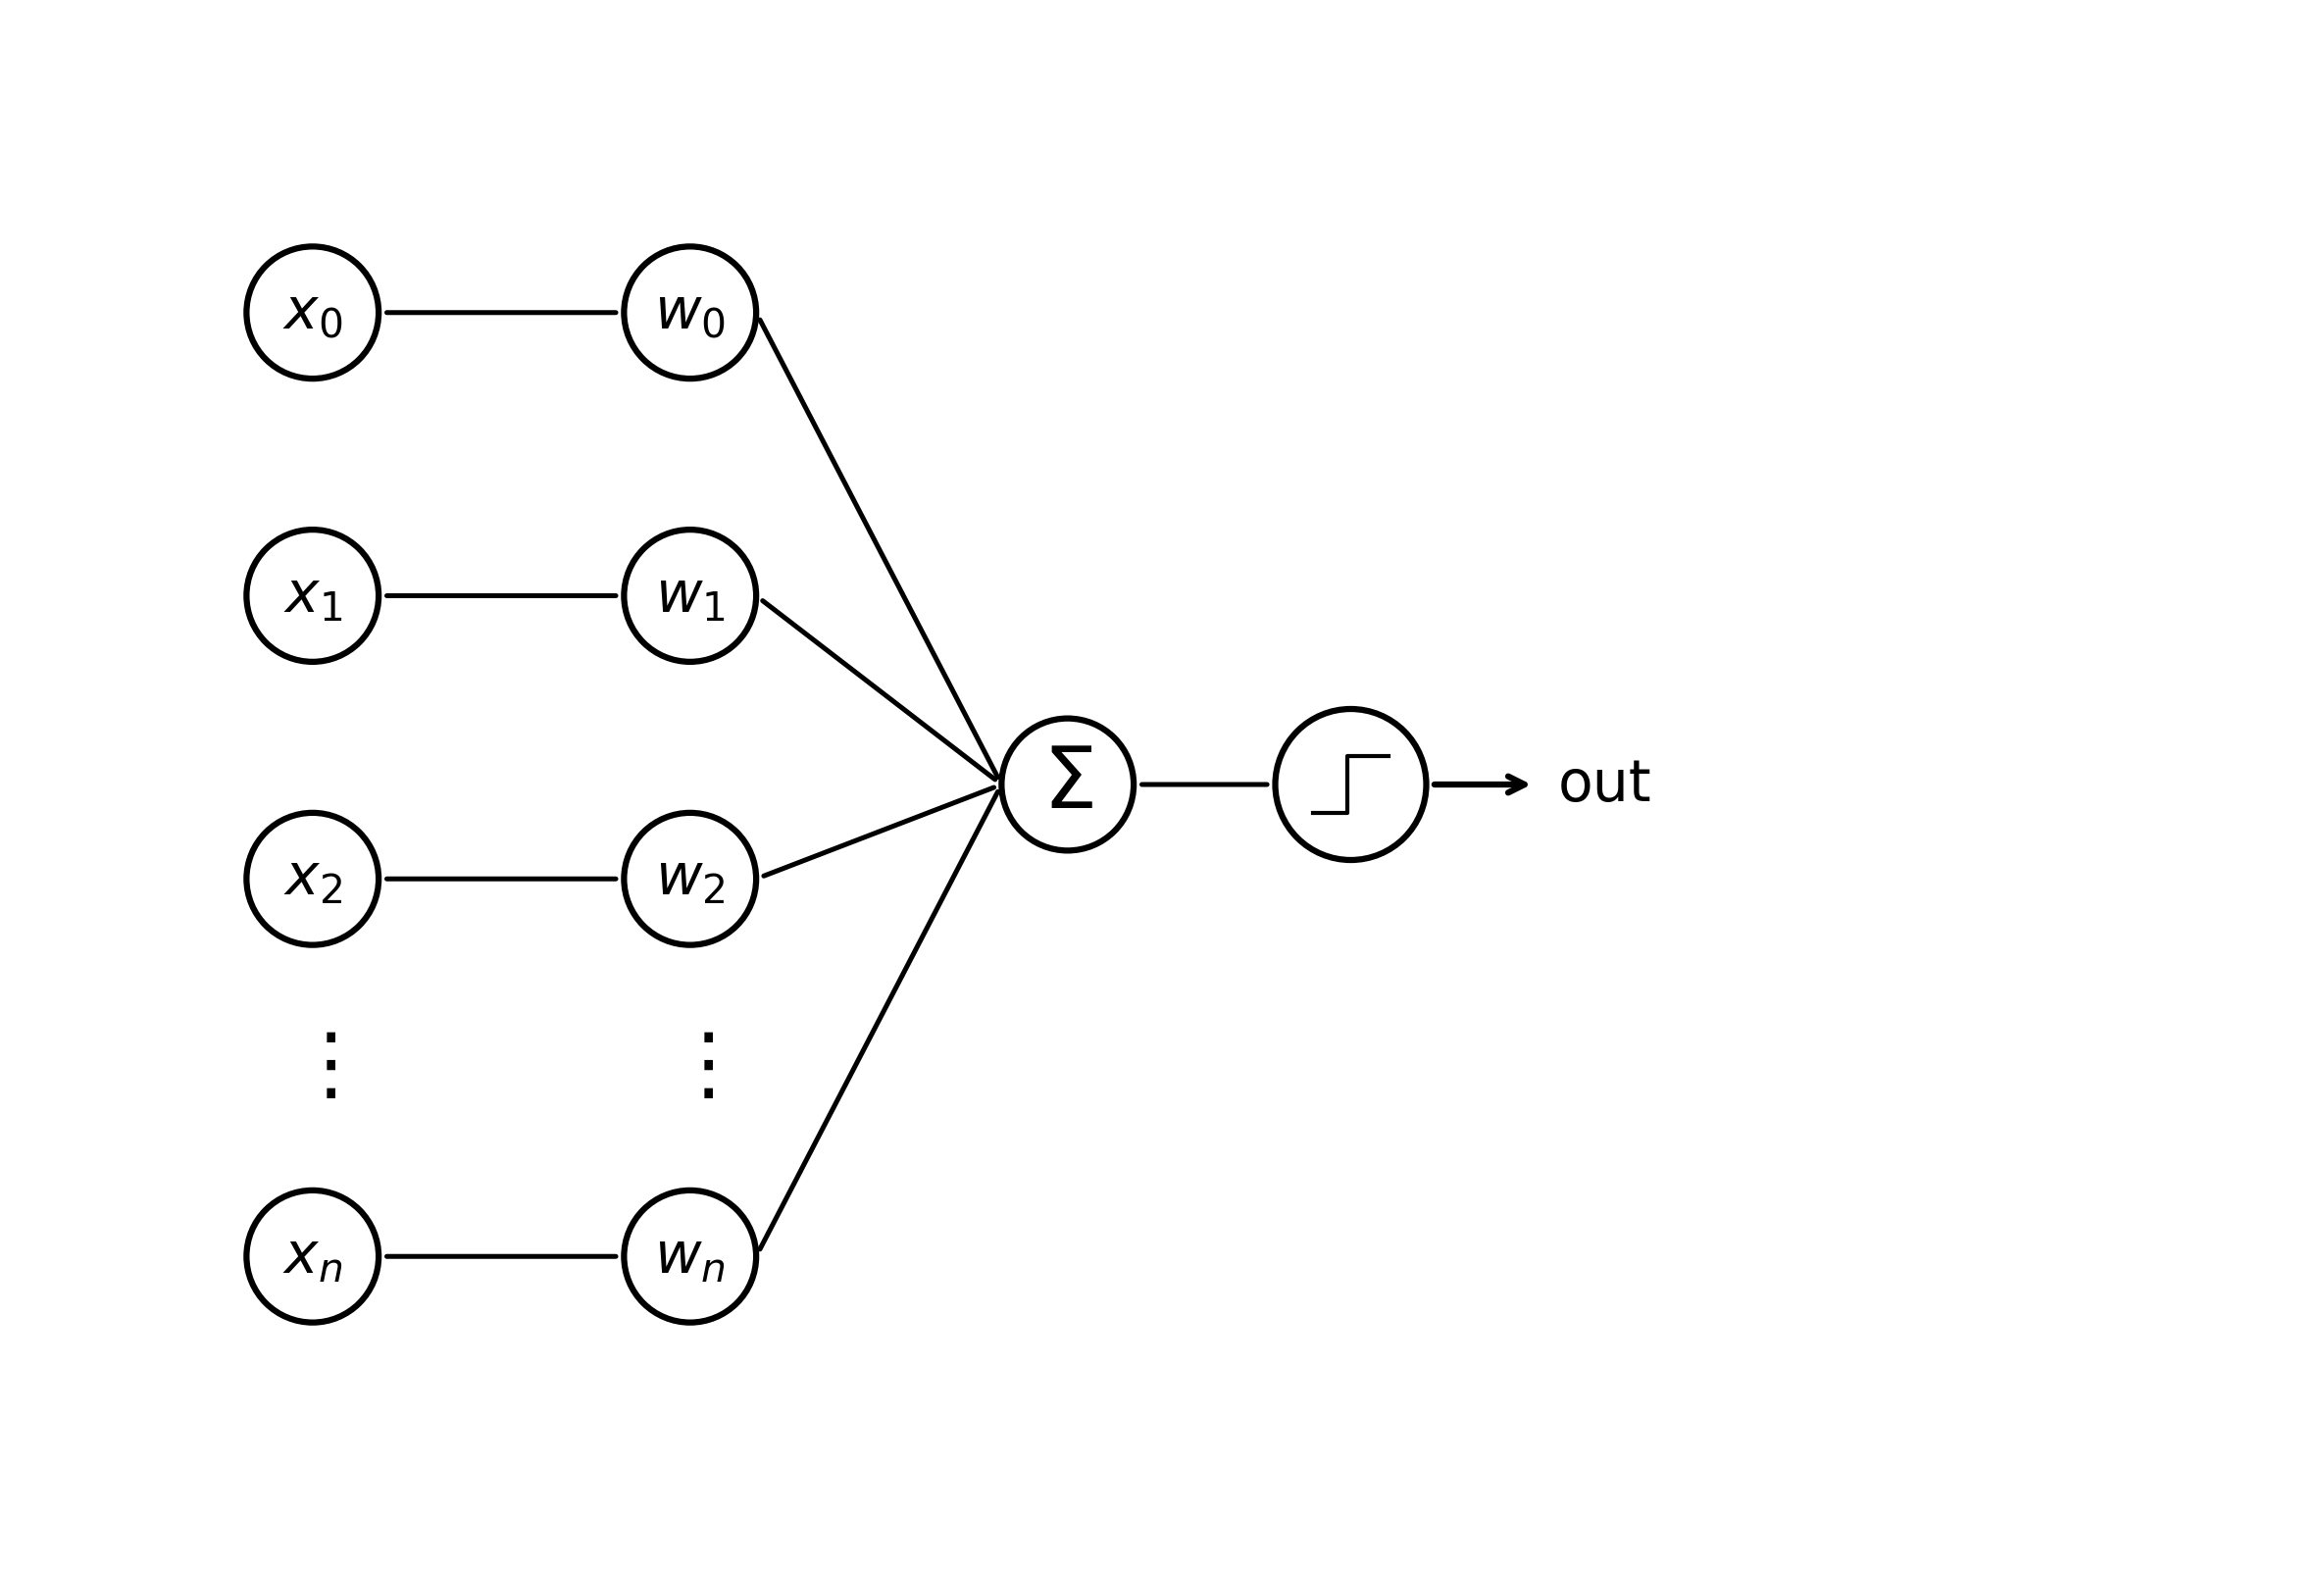

In [42]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=300)
ax.set_xlim(-1, 11)
ax.set_ylim(-1, 7)
ax.set_aspect('equal')
ax.axis('off')

r = 0.35  # node radius

# --- Positions ---
n_shown = 4  # x0, x1, x2, ..., xn
input_x = 0.5
weight_x = 2.5
sum_x = 4.5
act_x = 6.0
out_x = 7.0

input_ys  = [5.5, 4.0, 2.5, 0.5]   # x0, x1, x2, xn
weight_ys = [5.5, 4.0, 2.5, 0.5]   # w0, w1, w2, wn
sum_y = 3.0
act_y = 3.0

# --- Helper: draw a circle with text ---
def draw_node(x, y, text, fontsize=14):
    circle = plt.Circle((x, y), r, fill=False, edgecolor='black', linewidth=1.5, zorder=3)
    ax.add_patch(circle)
    ax.text(x, y, text, ha='center', va='center', fontsize=fontsize, zorder=4)

# --- Draw input nodes ---
input_labels = [r'$x_0$', r'$x_1$', r'$x_2$', r'$x_n$']
for i, (y, label) in enumerate(zip(input_ys, input_labels)):
    draw_node(input_x, y, label)

# Dots between x2 and xn
ax.text(input_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw weight nodes ---
weight_labels = [r'$w_0$', r'$w_1$', r'$w_2$', r'$w_n$']
for i, (y, label) in enumerate(zip(weight_ys, weight_labels)):
    draw_node(weight_x, y, label)

# Dots between w2 and wn
ax.text(weight_x, 1.5, r'$\vdots$', ha='center', va='center', fontsize=20)

# --- Draw summation node ---
draw_node(sum_x, sum_y, r'$\Sigma$', fontsize=21)

# --- Draw activation node ---
# Draw the circle
circle = plt.Circle((act_x, act_y), r + 0.05, fill=False, edgecolor='black', linewidth=1.5, zorder=3)
ax.add_patch(circle)

# Draw a step function symbol inside
step_xs = [act_x - 0.2, act_x - 0.02, act_x - 0.02, act_x + 0.2]
step_ys = [act_y - 0.15, act_y - 0.15, act_y + 0.15, act_y + 0.15]
ax.plot(step_xs, step_ys, 'k-', linewidth=1.0, zorder=4)

# --- Connections: input -> weight ---
for iy, wy in zip(input_ys, weight_ys):
    ax.annotate('', xy=(weight_x - r, wy), xytext=(input_x + r, iy),
                arrowprops=dict(arrowstyle='-', color='black', lw=1.2))

# --- Connections: weight -> summation ---
for wy in weight_ys:
    ax.annotate('', xy=(sum_x - r, sum_y), xytext=(weight_x + r, wy),
                arrowprops=dict(arrowstyle='-', color='black', lw=1.2))

# --- Connection: summation -> activation ---
ax.annotate('', xy=(act_x - r - 0.05, act_y), xytext=(sum_x + r, sum_y),
            arrowprops=dict(arrowstyle='-', color='black', lw=1.2))

# --- Connection: activation -> output ---
ax.annotate('', xy=(out_x, act_y), xytext=(act_x + r + 0.05, act_y),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5))

# # --- Labels ---
# ax.text(input_x, 6.3, 'Input', ha='center', va='bottom', fontsize=14, fontweight='bold')
# ax.text(weight_x, 6.3, 'Weight', ha='center', va='bottom', fontsize=14, fontweight='bold')
# ax.text(sum_x, sum_y + 1.2, 'Network\ninput function', ha='center', va='bottom', fontsize=11)
# ax.text(act_x, act_y + 1.2, 'Activation\nfunction', ha='center', va='bottom', fontsize=11)
ax.text(out_x + 0.1, act_y, 'out', ha='left', va='center', fontsize=14)

plt.tight_layout()
plt.show()

### References

- [1] Weinberger, K. (2017). Lecture 6 "Perceptron convergence proof"—Cornell CS4780 SP17 [Video]. YouTube. https://www.youtube.com/watch?v=kObhWlqIeD8